Roughly following dataquest https://www.dataquest.io/blog/sci-kit-learn-tutorial/

In [1]:
import pandas as pd

url = "https://community.watsonanalytics.com/wp-content/uploads/2015/04/WA_Fn-UseC_-Sales-Win-Loss.csv"
sales_data = pd.read_csv(url)

In [2]:
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


In [3]:
sales_data.dtypes

Opportunity Number                           int64
Supplies Subgroup                           object
Supplies Group                              object
Region                                      object
Route To Market                             object
Elapsed Days In Sales Stage                  int64
Opportunity Result                          object
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                             object
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid",color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot('Route To Market', data=sales_data, hue='Opportunity Result')
sns.despine(offset=10, trim=True)
plt.show()

<Figure size 1170x827 with 1 Axes>

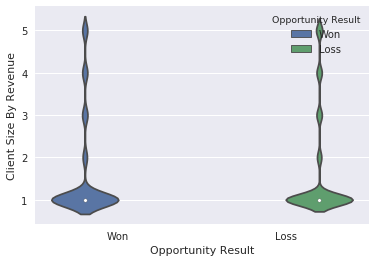

In [5]:
sns.violinplot(x="Opportunity Result", y="Client Size By Revenue", hue="Opportunity Result", data=sales_data)
plt.show()

In [6]:
from sklearn import preprocessing

lee = preprocessing.LabelEncoder()

encoded_value = lee.fit_transform(["paris","paris","tokyo","amsterdam"])

print(encoded_value)

[1 1 2 0]


In [7]:
# look at the different possible values
print("Supplies Subgroup' : ",sales_data['Supplies Subgroup'].unique())
print("Region : ",sales_data['Region'].unique())
print("Route To Market : ",sales_data['Route To Market'].unique())
print("Opportunity Result : ",sales_data['Opportunity Result'].unique())
print("Competitor Type : ",sales_data['Competitor Type'].unique())
print("'Supplies Group : ",sales_data['Supplies Group'].unique())

Supplies Subgroup' :  ['Exterior Accessories' 'Motorcycle Parts' 'Shelters & RV'
 'Garage & Car Care' 'Batteries & Accessories' 'Performance Parts'
 'Towing & Hitches' 'Replacement Parts' 'Tires & Wheels'
 'Interior Accessories' 'Car Electronics']
Region :  ['Northwest' 'Pacific' 'Midwest' 'Southwest' 'Mid-Atlantic' 'Northeast'
 'Southeast']
Route To Market :  ['Fields Sales' 'Reseller' 'Other' 'Telesales' 'Telecoverage']
Opportunity Result :  ['Won' 'Loss']
Competitor Type :  ['Unknown' 'Known' 'None']
'Supplies Group :  ['Car Accessories' 'Performance & Non-auto' 'Tires & Wheels'
 'Car Electronics']


In [8]:
# convert the categorical columns into numerics
le = preprocessing.LabelEncoder()
sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['Region'])
sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])

sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


In [9]:
# separate features and target variables
cols = [col for col in sales_data.columns if col not in ['Opportunity Number', 'Opportunity Result']]

data = sales_data[cols]
target = sales_data['Opportunity Result']

data.head()

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,5,2,4,2,24,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,8,2,1,2,16,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,2,0,4,2,69,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


In [10]:
# now split training and testing data
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.30, random_state = 10)

In [11]:
# use Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()

# train the algorithm and predict using the testing data
pred_gnb = gnb.fit(data_train,target_train).predict(data_test)

print('Naive-Bayes accuracy : ', accuracy_score(target_test, pred_gnb, normalize=True))

Naive-Bayes accuracy :  0.759056732741


In [12]:
# now LinearSVC aka Linear Support Vector Classification, a subclass of SVM Support Vector Machine
from sklearn.svm import LinearSVC

svc_model = LinearSVC(random_state=0)

# train the algorithm
pred_svc = svc_model.fit(data_train, target_train).predict(data_test)

print('LinearSVC accuracy : ', accuracy_score(target_test, pred_svc, normalize=True),' Why is this so bad?')

LinearSVC accuracy :  0.460697197539  Why is this so bad?


In [14]:
# now K neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)

pred_knn = neigh.fit(data_train, target_train).predict(data_test)

print('KNeighbors accuracy : ', accuracy_score(target_test, pred_knn, normalize=True))

KNeighbors accuracy :  0.814550580998


In [15]:
# performance comparison with yellowbrick, which I don't have :( 
#from yellowbrick.classifier import ClassificationReport

#visualizer_gnb = ClassificationReport(gnb, classes=['Won','Loss'])

#visualizer_gnb.fit(data_train, target_train)
#visualizer_gnb.score(data_test, target_test)
#g_gnb = visualizer.proof()

ModuleNotFoundError: No module named 'yellowbrick'